In [11]:
#import library
import tensorflow as tf
import numpy as np
from mnist import loader
import random
import pdb 
import matplotlib.pyplot as plt

In [12]:
def NNmodel():
    mnist_dim = 28
    hidden_dim = 50
    n_class = 10

    # create Variables
    weights= {  'w1' : tf.Variable(tf.truncated_normal([mnist_dim*mnist_dim, hidden_dim], mean = 0, stddev = 0.01), name='w1'),
                'w2' : tf.Variable(tf.truncated_normal([hidden_dim, n_class], mean = 0, stddev = 0.01), name='w2')}

    biases = {  'b1' : tf.Variable(tf.truncated_normal([hidden_dim]), name='b1'),
                'b2' : tf.Variable(tf.truncated_normal([n_class]), name='b2')}


    x = tf.placeholder(tf.float32, shape=[None, mnist_dim*mnist_dim], name='x')
    y = tf.placeholder(tf.int32, name='y')    # default shape=None
    dropout = tf.placeholder(tf.float32)  #dropout ratio

    h1 = tf.matmul(x, weights['w1'])+biases['b1']
    h1 = tf.nn.dropout(h1, keep_prob = 1-dropout)
    pred = tf.matmul(h1, weights['w2'])+biases['b2']

    probs = tf.nn.softmax(pred)
    log_probs = tf.log(probs + 1e-8)

    one_hot_y = tf.one_hot(y, n_class, on_value=1, off_value=0, axis=-1)
    cross_entropy_loss = - tf.mul(tf.cast(one_hot_y, tf.float32),log_probs)
    loss = tf.reduce_sum(cross_entropy_loss)

    # Evaluate model
    correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(one_hot_y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    return x, y, dropout, probs, loss, accuracy


Epoch 0
Training_loss= 2.292252  Training_Accuracy=0.136950  	 Testing_loss= 2.240781  Testing_Accuracy= 0.240500
Epoch 1
Training_loss= 2.102249  Training_Accuracy=0.313317  	 Testing_loss= 1.810565  Testing_Accuracy= 0.587800
Epoch 2
Training_loss= 1.536413  Training_Accuracy=0.545167  	 Testing_loss= 1.167665  Testing_Accuracy= 0.722800
Epoch 3
Training_loss= 1.103924  Training_Accuracy=0.672933  	 Testing_loss= 0.842597  Testing_Accuracy= 0.795100
Epoch 4
Training_loss= 0.886003  Training_Accuracy=0.735100  	 Testing_loss= 0.675827  Testing_Accuracy= 0.828300


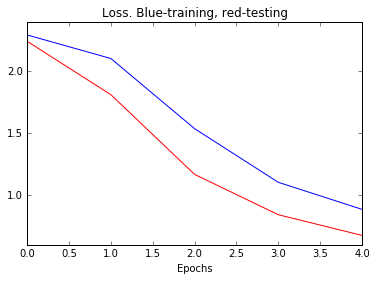

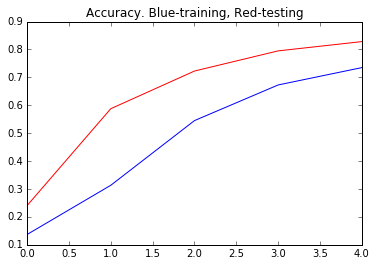

In [14]:

data_path = 'data'
data_loader = loader.MNIST(data_path)
ims, labels = data_loader.load_training()
ims_test, labels_test = data_loader.load_testing()

#ims= np.float32(ims) + 128
ims = ims/255.0
ims_test = ims_test/255.0

im_mean = np.mean(ims,axis=0)
im_test_mean = np.mean(ims_test, axis=0)

lr = 0.001
batch_size = 20
n_epoch = 5
iter_per_epoch = int(len(ims)/batch_size)
iter_per_epoch_test = int(len(ims_test)/batch_size)

loss_train = []
loss_test = []
Acc_train = []
Acc_test = []

x, y, dropout, tf_probs, tf_loss, accuracy = NNmodel()
tf_loss = tf_loss/batch_size

#optimizer = tf.train.AdamOptimizer(learning_rate = lr).minimize(tf_loss)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = lr).minimize(tf_loss)
# create session
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
saver = tf.train.Saver()
order_list_train = range(len(ims))
order_list_test = range(len(ims_test))
#pdb.set_trace()
for epoch in xrange(n_epoch):
    random.shuffle(order_list_train)
    random.shuffle(order_list_test)
    print "Epoch %d"%(epoch)
    cost_train = 0
    cost_test = 0
    A_train = 0
    A_test = 0
    for idx in xrange(iter_per_epoch):
        batch_xs = ims[order_list_train[idx*batch_size:(idx+1)*batch_size]] - im_mean
        batch_ys = labels[order_list_train[idx*batch_size:(idx+1)*batch_size]]
        P, L, A, _= sess.run([tf_probs, tf_loss,accuracy,optimizer],feed_dict={x:batch_xs, y:batch_ys,dropout:0.5})
        cost_train += L
        A_train += A
    for idx in xrange(iter_per_epoch_test):
        batch_xs_test = ims_test[order_list_test[idx*batch_size:(idx+1)*batch_size]] - im_mean
        batch_ys_test = labels_test[order_list_test[idx*batch_size:(idx+1)*batch_size]]
        P, L, A = sess.run([tf_probs, tf_loss, accuracy],feed_dict={x:batch_xs_test, y:batch_ys_test, dropout:0.0})
        cost_test += L
        A_test += A
    if (epoch+1)%1==0:
        loss_train.append(cost_train/iter_per_epoch)
        Acc_train.append(A_train/iter_per_epoch)
        loss_test.append(cost_test/iter_per_epoch_test)
        Acc_test.append(A_test/iter_per_epoch_test)
        print "Training_loss= %f  Training_Accuracy=%f  \t Testing_loss= %f  Testing_Accuracy= %f" \
        %(cost_train/iter_per_epoch,A_train/iter_per_epoch, cost_test/iter_per_epoch_test,A_test/iter_per_epoch_test)
plt.figure(1)

plt.title('Loss. Blue-training, red-testing')
plt.xlabel('Epochs')
plt.plot(loss_train, 'b', loss_test, 'r')
plt.figure(2)
plt.title('Accuracy. Blue-training, Red-testing')
plt.plot(Acc_train, 'b', Acc_test, 'r')
plt.title('Accuracy. Blue-training, Red-testing')
plt.show()
#plt.savefig('result.png')

